![Title](Images/cisco.png)
Астахова Екатерина
фт-360007

# Лабораторная работа - Обнаружение аномалий интернет-метра 


### Цели
<li>**Часть 1: Разработка функций**</li>
<li>**Часть 2: Обнаружение аномалий Евклида**</li>
### История/Cценарий
Алгоритмы обнаружения аномалий обнаруживают точки данных, которые выделяются из модели. Например, алгоритмы такого рода могут использоваться для проверки безопасности авиационных двигателей путем контроля таких данных, как расход топлива, температура и т.д. Всякий раз, когда датчики показывают экстремальные значения, такие как необычно высокая температура, система обнаружения аномалий предупреждает оператора, который затем может принять меры для решения потенциальных проблем. Постоянное совершенствование стандартов безопасности не является уникальным для транспортного сектора, и эти алгоритмы находят применение во всех отраслях промышленности: от производства продуктов питания, до производства игрушек для детей. 
### Необходимые ресурсы
* 1 ПК с доступом в Интернет
* Raspberry Pi версии 2 или выше
* Библиотеки Python: numpy, pandas, matplotlib
* Файлы данных: rpi_data_processed.csv


## Часть 1: Разработка функций

#### Шаг 1: Импортируйте библиотеки Python.
На этом этапе вы импортируете библиотеки Python.

In [1]:
# Ячейка для кода №1
import numpy as np
import pandas as pd

#### Шаг 2. Создайте кадр данных и измените величины.
Величины, которые записываются при сборе данных, также называемые функциями, могут потребовать некоторого преобразования перед анализом, например, величина, называемая 'ping' полученная при измерении скорости интернета, описывает интервалы времени. Контраст наблюдается, когда мы рассматриваем другие контролируемые величины, а именно скорости загрузки и выгрузки. Их единицы измерения **противоположны** времени. Из-за этого 'ping' не является оптимальным выбором для статистического анализа. Лучшие результаты достигаются с использованием связанной функции, которую мы будем называть 'ping rate'. Она рассчитывается путем применения простого преобразования $$\mathrm{ping\ rate} = \frac{1}{\mathrm{ping\ time}}.$$
Этот процесс 'модификации' величин с точки зрения анализа называется 'feature engineering' и, как правило, является важной частью рабочего процесса машинного обучения. 

Загрузите данные скорости интернета из файла `rpi_data_processed.csv` в кадр данных Pandas с именем `df`. Используя это как отправную точку, сгенерируйте еще один кадр данных `df_rates`, три столбца которого: `download_rate`, `upload_rate` и `ping_rate` соответственно. При вычислении последней функции убедитесь, что результат указан в единицах `1/seconds`.

In [2]:
#Ячейка для кода №2
# Загрузите данные скорости интернета
df = pd.read_csv('rpi_data_processed.csv')

# Инициализируйте кадр данных df_rates
df_rates = df.drop(['Ping (ms)', 'Date', 'Time'], axis=1)

# Переименуйте столбцы download и
# upload в df_rates
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}
df_rates = df_rates.rename(columns = lookup)

# Вычислите ping_rate
ping_rate = 1. / df['Ping (ms)']

# Преобразуйте ping_rate в 1/seconds
ping_rate = 1000. * ping_rate

# Добавьте столбец для выполнения задачи
df_rates['ping_rate'] = ping_rate

In [4]:
#Ячейка для кода №3
# Проверьте результат
#...
df

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05
5,14.18,2016-11-24,13:39:01,17.586,91.88
6,14.07,2016-11-24,13:39:30,21.835,92.18
7,14.13,2016-11-24,13:40:00,20.464,92.05
8,14.14,2016-11-24,13:40:30,19.293,90.79
9,14.07,2016-11-24,13:41:00,20.354,92.64


In [5]:
df_rates

,upload_rate,download_rate,ping_rate
0,14.31,91.80,37.048014
1,14.12,88.19,40.763085
2,14.11,59.86,49.443758
3,14.22,91.81,51.727705
4,14.08,92.05,44.456299
5,14.18,91.88,56.863414
6,14.07,92.18,45.798031
7,14.13,92.05,48.866302
8,14.14,90.79,51.832271
9,14.07,92.64,49.130392


#### Шаг 3. Визуализация данных.

Разумно ожидать, что измеренные значения `download_rate`, `upload_rate` и `ping_rate` будут сосредоточены вокруг их средних значений. Обратите внимание на визуализацию ниже, чтобы увидеть это. Используйте ползунки для изменения угла и азимута графика.

**Необязательно** <br>
Поскольку данные скорости интернета включают в себя только три разных величины, их особенно просто визуализировать. Системы машинного обучения часто используют десятки или даже сотни функций, что затрудняет создание интуитивно понятных графиков. Хотя рисовании выразительных фигур невозможно во многих ситуациях, интерактивные визуализации остаются отличным способом представления данных перед аудиторией. Далее вам можете быть будет интересно прочитать и понять приведенный ниже код с помощью двух комментариев: 

* Класс `Axes3D` из `mpl_toolkits.mplot3d` позволяет вам генерировать трехмерные графики, расширяя функциональность знакомого модуля `matplotlib.pyplot`. 
* Метод `interact`, который играет решающую роль в анимации визуализации, находится в модуле `ipywidgets`. Этот модуль, в свою очередь, является частью среды `Ipython` для запуска Python в интерактивном режиме.  

In [6]:
ping_rate

0      37.048014
1      40.763085
2      49.443758
3      51.727705
4      44.456299
5      56.863414
6      45.798031
7      48.866302
8      51.832271
9      49.130392
10     52.603893
11     55.273049
12     55.135910
13     54.513737
14     42.866941
15     55.840965
16     51.837644
17     49.709201
18     51.075132
19     61.109753
20     52.227503
21     51.700962
22     45.539414
23     50.122801
24     58.377116
25     50.448996
26     48.640498
27     60.063667
28     47.537555
29     44.529545
         ...    
643    52.345059
644    57.750058
645    50.589366
646    51.535766
647    54.939018
648    45.672528
649    51.025615
650    52.487928
651    57.640210
652    47.250047
653    50.614972
654    46.317740
655    57.378930
656    42.718612
657    55.181547
658    53.061658
659    45.195697
660    52.021016
661    46.153136
662    52.526526
663    45.806422
664    53.157559
665    55.072145
666    45.716376
667    43.340701
668    47.728141
669    51.554364
670    49.7092

In [7]:
lookup

{'Download (Mbit/s)': 'download_rate', 'Upload (Mbit/s)': 'upload_rate'}

In [8]:
# Ячейка для кода №4
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [25]:
# Ячейка для кода №5
def scatter_view(x, y, z, azim, elev):
    # Инициализация фигуры и осей
    fig = plt.figure(figsize=(10, 10))
    ax = Axes3D(fig)
    
    # Вычисление диаграммы рассеяния
    ax.scatter(x, y, z)
    ax.set_xlabel('D rate (Mbit/s)', fontsize=15)
    ax.set_ylabel('U rate (Mbit/s)', fontsize=15)
    ax.set_zlabel('P rate (1/s)', fontsize=15)
    
    # Укажите азимут
    # и высоту
    ax.azim = azim
    ax.elev = elev

In [26]:
# Ячейка для кода №6
# Нарисуйте интерактивный график
xi = df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']
interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev),
         azim=(0, 90), elev=(0, 90))
plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

## Часть 2: Обнаружение аномалий Евклида

Как показано на трехмерном графике выше, аномалии расположены далеко от 'средней точки'. Система обнаружения аномалий, которую мы обсудим, использует эту идею. Точки, которые лежат за пределами определенного расстояния от среднего, будут считаться аномальными, тогда как все остальные будут считаться нормальными. 

Для краткости представим координаты `[download_rate, upload_rate, ping_rate]` точки данных, как  $\{x, y, z\}$. Тогда дистанция этого измерения от местоположения среднего значения $\{\mu_{x}, \mu_{y}, \mu_{z}\}$ задается следующей формулой:

$$d = \sqrt{(x - \mu_x)^2 + (y-\mu_y)^2 + (z - \mu_z)^2},$$ 

Это основной компонент системы обнаружения аномалий, которую мы будем строить. В качестве ремарки, эта простая концепция расчёта расстояния называется **Евклидова метрика**, чтобы отличить ее от возможных обобщений. Точки такие, что $x$, $y$, или $z$ differ заметно отличаются от средних $\mu_{x}$, $\mu_{y}$, and $\mu_{z}$, можно рассматривать как аномалии. 

#### Шаг 1: Вычислите средние значения.
Используя подходящую функцию Pandas, вычислите список `mu`, элементами которого являются средняя скорость загрузки, выгрузки и пинга. 

In [29]:
# Ячейка для кода №7
mu = df_rates.mean() #вычислили среднее значение

#### Шаг 2: Рассчитаем Евклидовое расстояние.
Найдите Евклидовое расстояние между каждой точкой и местоположением среднего значения. Вы можете прибегнуть к функциям `np.square` и `np.sqrt` библиотеки Numpy. Они вычисляют [поэлементно](http://www.glue.umd.edu/afs/glue.umd.edu/system/info/olh/Numerical/Matlab_Matrix_Manipulation_Software/Matrix_Vector_Operations/elementwise) степень и квадратный корень для любого входного массива. Использование поэлементных функций позволяет вычислять расстояния без циклов `for`, которые перебирают все координаты точек. 

In [31]:
# Ячейка для кода №8
euclid_sq = np.square(df_rates - mu).sum(axis=1)
euclid = np.sqrt(euclid_sq)
euclid

0      11.703686
1       8.222034
2      30.602098
3       3.398784
4       4.511934
5       8.343823
6       3.363034
7       1.671271
8       3.223660
9       2.272003
10      4.246316
11      6.874435
12      6.616428
13      6.349290
14      6.073021
15      7.763742
16      3.750928
17      1.154581
18      3.223401
19     17.251300
20      3.748653
21      3.240229
22      3.274506
23      1.896114
24      9.743715
25      2.357380
26      1.586022
27     11.558308
28      1.248716
29      4.585743
         ...    
643     4.851738
644    10.762919
645     4.578885
646     4.418008
647     6.360831
648     6.789079
649     3.853468
650     4.169190
651    17.634425
652     6.439094
653     2.838024
654     7.722714
655    10.934771
656     6.954882
657     6.776881
658     4.411827
659     5.630015
660     4.976159
661     5.470055
662     4.291804
663     6.953003
664     4.750360
665     7.651963
666     5.280679
667     8.395215
668     2.110602
669     6.329109
670     5.5954

#### Шаг 3: Создайте гистограмму.
Создайте гистограмму расстояния между координатами каждой из точек и местоположения среднего значения. Теперь аномалии легко распознаются в 'хвосте' гистограммы. 

Text(0,0.5,'Relative frequency')

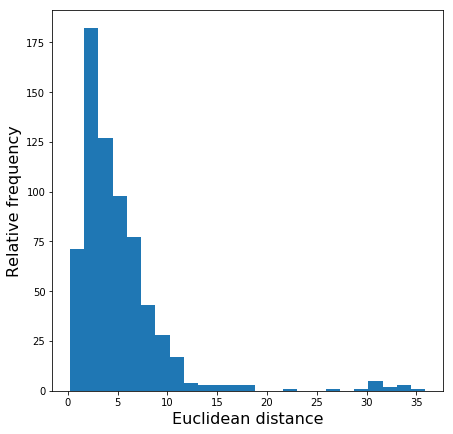

In [76]:
# Ячейка для кода №9
# Гистограмма Евклидова расстояния 
fig = plt.figure(figsize=(7, 7))
# постройте гистограмму с использованием 25 интервалов
plt.hist(euclid,25)
plt.xlabel('Euclidean distance', fontsize=16)
plt.ylabel('Relative frequency', fontsize=16)

#### Шаг 4. Вычислите нормализованное расстояние.
Полезно использовать для этого термин **нормализованного расстояния**. Это отношение каждого расстояния к максимальному значению $d$. Дальнейшие аномальные точки тогда имеют нормализованное расстояние 1. Вычислить нормированное Евклидово расстояние для каждой точки в наборе данных. 

In [79]:
# Ячейка для кода №10
# Максимальное Евклидово расстояние
max_euclid = euclid.max()
# Нормализованное Евклидово расстояние
nmd_euclid = euclid/max_euclid
print(euclid[0])
print(max_euclid)
nmd_euclid

11.703686461240554
35.88517639980918


0      0.326143
1      0.229121
2      0.852778
3      0.094713
4      0.125733
5      0.232514
6      0.093717
7      0.046573
8      0.089833
9      0.063313
10     0.118331
11     0.191568
12     0.184378
13     0.176933
14     0.169235
15     0.216350
16     0.104526
17     0.032174
18     0.089825
19     0.480736
20     0.104462
21     0.090294
22     0.091250
23     0.052838
24     0.271525
25     0.065692
26     0.044197
27     0.322091
28     0.034798
29     0.127789
         ...   
643    0.135202
644    0.299927
645    0.127598
646    0.123115
647    0.177255
648    0.189189
649    0.107383
650    0.116181
651    0.491413
652    0.179436
653    0.079086
654    0.215206
655    0.304716
656    0.193809
657    0.188849
658    0.122943
659    0.156890
660    0.138669
661    0.152432
662    0.119598
663    0.193757
664    0.132377
665    0.213235
666    0.147155
667    0.233947
668    0.058815
669    0.176371
670    0.155927
671    0.295241
672    0.166310
Length: 673, dtype: floa

#### Шаг 5: Визуализируйте уровень тревоги.
Чтобы обозначить точки как нормальные или аномальные, вы должны определить **границу принятия решений**. Необходимо выбрать расстояние, за пределами которого точки считаются нетипичными. Хотя положение границы можно зафиксировать на основе качественной оценки, количественный подход кажется предпочтительным. Вы можете постепенно увеличивать границу принятия решений и контролировать, как изменяется уровень тревоги. В частности, уровень тревоги - это количество аномалий, деленное на общее количество точек данных. Эта процедура 'тщательно исследует' все возможные границы принятия решений, позволяя выбрать наиболее подходящий. 

Измените нормированное расстояние до границы принятия решений от 0 до 1 и запишите уровень тревоги на каждом шаге. Сохраните значения нормализованного расстояния и уровня тревоги в списках `nmd_range` и `ecl_alarm_rate` соответственно. Чтобы визуализировать эти результаты, сгенерируйте график. 

In [80]:
# Ячейка для кода №11
# Возьмите уровень тревоги как функцию
# от нормализованного расстояния до границы принятия решений
ecl_alarm_rate = []
nmd_range = np.linspace(0, 1, 400)
for nmd_decision in nmd_range:
    # Подсчитайте количество значений с более высоким Евклидовым расстоянием, чем 
    # текущая граница принятия решений 
    # РЕШЕНИЕ:
    num_fail = (nmd_euclid > nmd_decision).sum()
    ecl_alarm_rate.append(float(num_fail) / len(euclid))

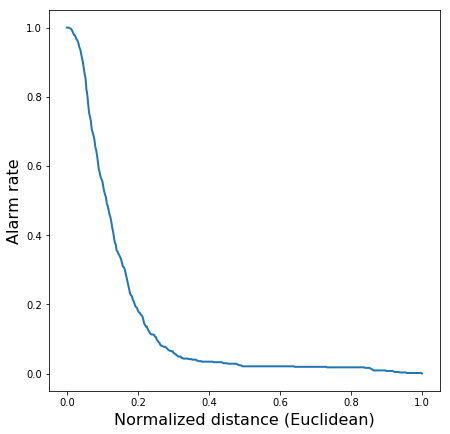

In [81]:
# Ячейка для кода №12
# Изобразите на графике число тревог в 
# зависимости от расстояния до границы принятия решений
fig = plt.figure(figsize=(7, 7))
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)
plt.show()

#### Шаг 6: Выберите границу принятия решений.
Приведенный выше график преобразует проблему фиксации границы принятия решений в сторону выбора уровня тревоги, что выгодно, потому что область применения обычно определяет разумный выбор уровня тревоги. Например, при тестировании безопасности самолётных двигателей мы может устанвоить уровень тревоги относительно высоким, что позволит обнаруживать как основные, так и незначительные аномалии, а уровень риска останется низким. 

Предположим, что для этого конкретного прецедента оптимальный уровень тревоги равен 0.1. Найдите наименьшее нормализованное расстояние до границы принятия решений (`ecl_decision`), так что уровень тревоги падает строго ниже порогового значения. Поскольку уровень тревоги на выбранной границе принятия решений будет не точно 0.1, сохраните точное значение в переменной `ecl_threshold`. 


In [82]:
# Ячейка для кода №13
# Выберите границу принятия решений
threshold = 0.1
index, ecl_threshold = next(tpl for tpl in enumerate(ecl_alarm_rate) if tpl[1] < threshold)
ecl_decision = nmd_range[index]

#### Шаг 7. Визуализируйте границу принятия решений.
Сгенерируйте график с Шага 5 снова и используйте точку, чтобы отметить местоположение границы принятия решений. 

Text(0,0.5,'Alarm rate')

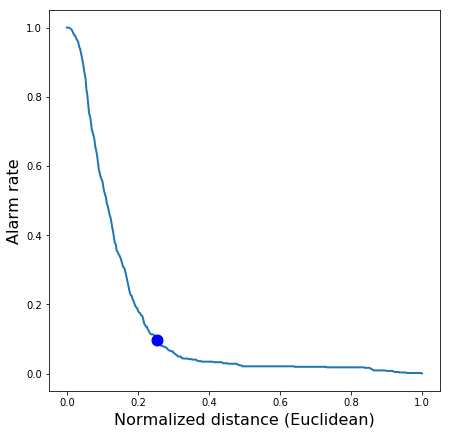

In [90]:
#Ячейка для кода №14
# Уровень тревоги с границей принятия решений
fig = plt.figure(figsize=(7, 7))
# Изобразите уровень тревоги как функцию нормализованного Евклидова расстояния
plt.plot(nmd_range, ecl_alarm_rate, linewidth=2)
# Изобразите выбранный порог принятия решений и уровень тревоги
plt.plot(ecl_decision, ecl_threshold,'bo', markersize=11)

plt.xlabel('Normalized distance (Euclidean)', fontsize=16)
plt.ylabel('Alarm rate', fontsize=16)

#### Шаг 8. Визуализируйте границу принятия решений в 3D.
Поскольку наш алгоритм обнаружения аномалий использует Евклидовы расстояния, границы принятия решений при визуализации в трех измерениях являются сферическими. Изучите график ниже, чтобы увидеть это. Мы также рекомендуем вам прочитать и понять приведенный ниже код. 

In [84]:
#Ячейка для кода №15
# Сфера принятия решений (полярные координаты)
radius = ecl_decision * max_euclid
phi = np.linspace(0, 2 * np.pi, 300)
theta = np.linspace(0, 2 * np.pi, 300)

# Сфера принятия решений (декартовы координаты)
xs = radius * np.outer(np.sin(theta), np.cos(phi))
ys = radius * np.outer(np.sin(theta), np.sin(phi))
zs = radius * np.outer(np.cos(theta), np.ones(np.size(phi)))

# Поместите центр сферы приянтия решений в местоположение среднего значения 
ecl_xd = xs + df_rates['download_rate'].mean()
ecl_yd = ys + df_rates['upload_rate'].mean()
ecl_zd = zs + df_rates['ping_rate'].mean()

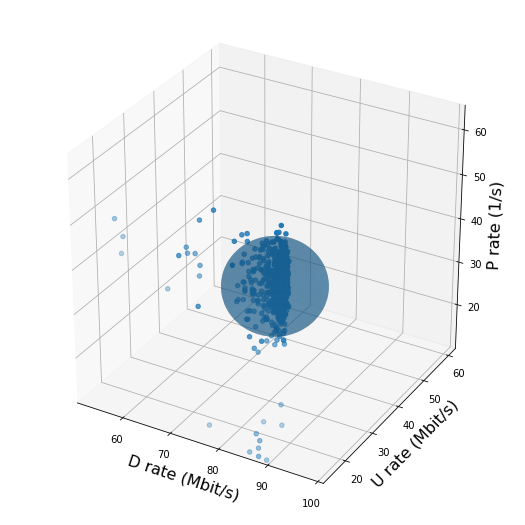

In [85]:
#Ячейка для кода №16
# Инициализация фигуры и осей
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

# Построение графика по данным
ax.scatter(df_rates['download_rate'],
           df_rates['upload_rate'], 
           df_rates['ping_rate'])

# Отображение границы принятия решений
ax.plot_surface(ecl_xd, ecl_yd, ecl_zd,
                linewidth=0, alpha=0.25)

# Label axes
ax.set_xlabel('D rate (Mbit/s)', fontsize=16)
ax.set_ylabel('U rate (Mbit/s)', fontsize=16)
ax.set_zlabel('P rate (1/s)', fontsize=16)
    
# --------------------------------------------------
# Установите равное соотношение сторон для всех осей
# --------------------------------------------------

# Экстремальные значения x, y, z
extremes = []
extremes.append([df_rates['download_rate'].min(),
                 df_rates['download_rate'].max()])
extremes.append([df_rates['upload_rate'].min(),
                 df_rates['upload_rate'].max()])
extremes.append([df_rates['ping_rate'].min(),
                 df_rates['ping_rate'].max()])

# Половины ширины и средние точки
hwidths = [(row[1] - row[0]) / 2.0 for row in extremes]
midpts = [(row[1] + row[0]) / 2.0 for row in extremes]

# Задайте xlim, ylim, zlim
left_ends = midpts - np.max(hwidths)
right_ends = midpts + np.max(hwidths)
ax.set_xlim([left_ends[0], right_ends[0]]);
ax.set_ylim([left_ends[1], right_ends[1]]);
ax.set_ylim([left_ends[2], right_ends[2]]);

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>